In [1]:
import scipy.interpolate
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt

#set default marker sizes, line widths etc
mpl.rcParams['lines.linewidth']=3.0
mpl.rcParams['lines.markersize']=10.0
mpl.rcParams['lines.markeredgewidth']=1.0
mpl.rcParams['xtick.labelsize']=17
mpl.rcParams['ytick.labelsize']=17
mpl.rcParams['axes.labelsize']=17
mpl.rcParams['font.size']=20


In [2]:
numCp_Lip260_Cpl7=[10,20,30,40]
numCp_Lip270_Cpl7=[20,70,90,120]

#store them in one array together
numCp_array=[numCp_Lip260_Cpl7,numCp_Lip270_Cpl7]

#The filename for the stored data in files.
filePathName=['260/7','270/7']

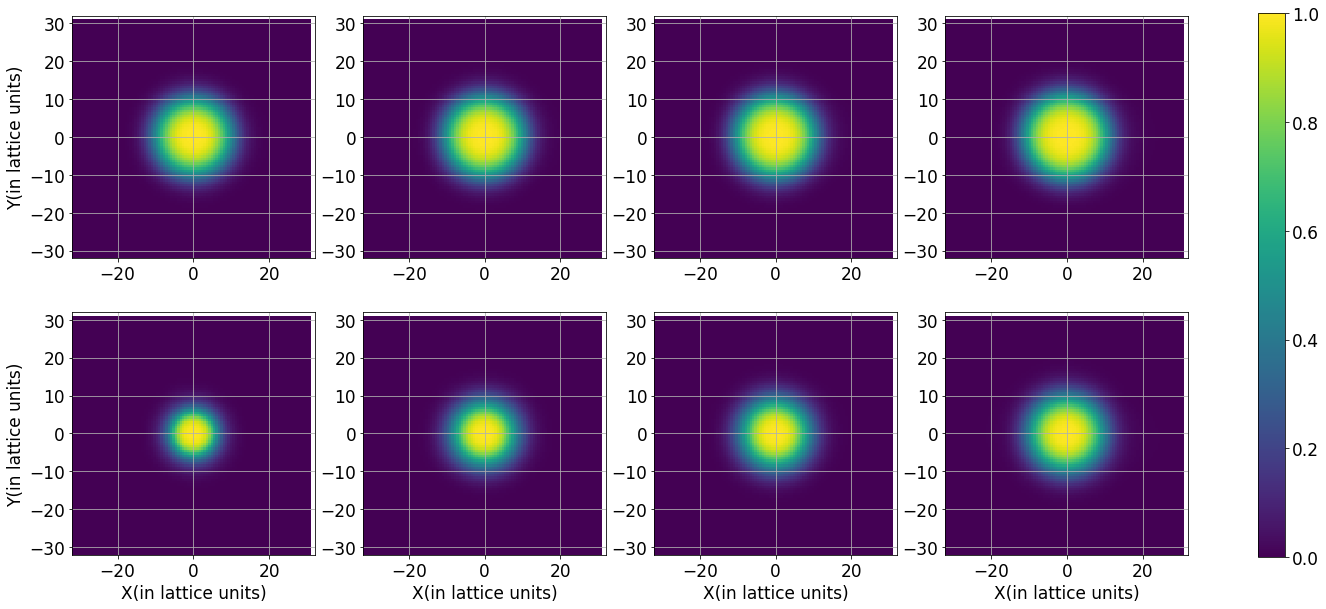

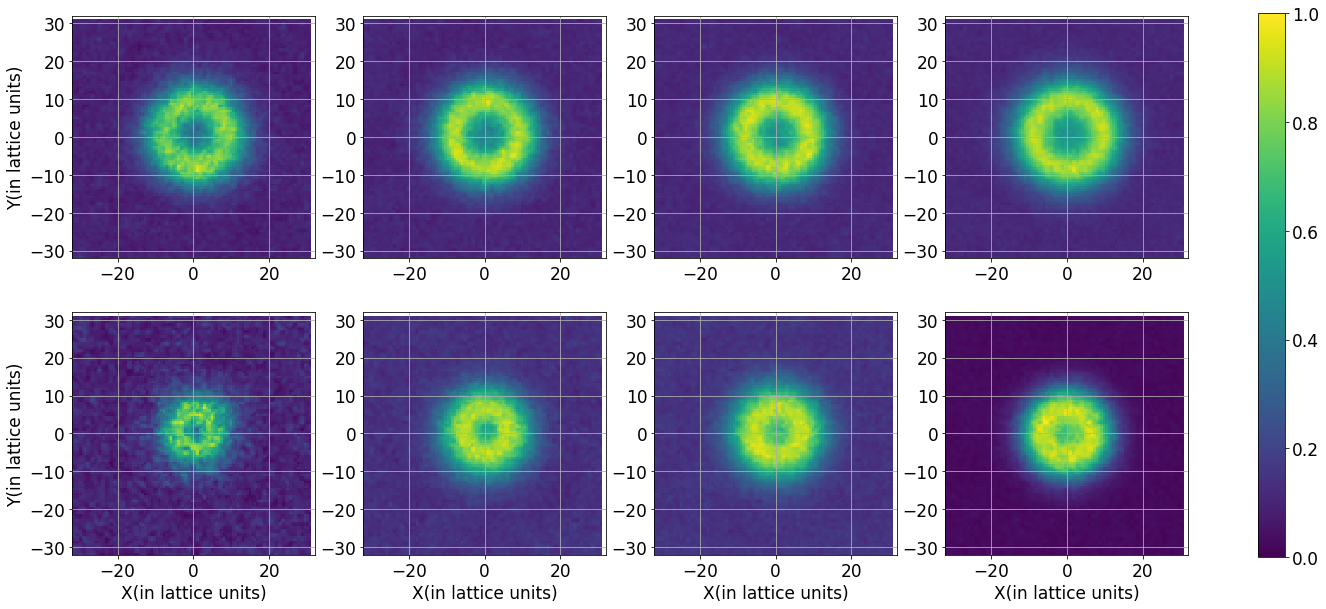

In [26]:
fig1,axes1=plt.subplots(nrows=2,ncols=4, figsize=(2.5*10,10))

fig2,axes2=plt.subplots(nrows=2,ncols=4, figsize=(2.5*10,10))
    
for ax1,ax2 in zip(fig1.axes,fig2.axes):
    ax1.set_xlim([-32,32])
    ax1.set_ylim([-32,32])
    ax1.grid()

    ax2.set_xlim([-32,32])
    ax2.set_ylim([-32,32])
    ax2.grid()

for ax1,ax2 in zip(axes1[1,:],axes2[1,:]):
    ax1.set_xlabel("X(in lattice units)")
    ax2.set_xlabel("X(in lattice units)")
    
for ax1,ax2 in zip(axes1[:,0],axes2[:,0]):
    ax1.set_ylabel("Y(in lattice units)")
    ax2.set_ylabel("Y(in lattice units)")

#Unrolling axes helps plotting in a single for loop.
axes_unrolled1=axes1.reshape(1,8)[0]
axes_unrolled2=axes2.reshape(1,8)[0]

#First run loop around set of number of copolymer setup for specific
#number of lipids, and number of copolymers.
for index1,numCpset in enumerate(numCp_array):
    #Then loop over numCp from this set.
    for index2,numCp in enumerate(numCpset):
        
        dataPore=np.loadtxt(filePathName[index1]+"/porecoordinates"+str(numCp)+".dat")
        zPore=dataPore[:,2]
        zPore /= zPore.max()
        
        dataPoly=np.loadtxt(filePathName[index1]+"/Polymerscoordinates"+str(numCp)+".dat")
        zPoly=dataPoly[:,2]
        zPoly /= zPoly.max()
        
        if index1==0 and index2==0:
            x=data[:,0]-32
            y=data[:,1]-32
            points = np.vstack((x, y)).T
            xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
            xi, yi = np.meshgrid(xi, yi)
            
        # Interpolate pore data
        ziPore= scipy.interpolate.griddata(points, zPore, (xi, yi), method='linear')
        
        # Interpolate polymer data
        ziPoly= scipy.interpolate.griddata(points, zPoly, (xi, yi), method='linear')
  
        axes_unrolled1[4*index1+index2].scatter(x, y, c=zPore,s=0)
        axes_unrolled2[4*index1+index2].scatter(x, y, c=zPoly,s=0)

        im1=axes_unrolled1[4*index1+index2].imshow(ziPore, vmin=z.min(), vmax=z.max(), origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
        im2=axes_unrolled2[4*index1+index2].imshow(ziPoly, vmin=z.min(), vmax=z.max(), origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])

fig1.colorbar(im1, ax=axes1.ravel().tolist())
fig2.colorbar(im2, ax=axes2.ravel().tolist())